## Preparación de datos

### Importaciones

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

### Carga del dataset

Leer en un dataframe de pandas el dataset contenido en el fichero **Automobile_price.csv** y Muestra las primeras 10 líneas.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,12495€
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,8860,...,130,mpfi,3.47,2.68,900,111,5000,21,27,15278€
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,9450,...,152,mpfi,2.68,3.47,900,154,5000,19,26,15278€
3,2,164,audi,gas,std,four,sedan,fwd,front,9980,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,12917€
4,2,164,audi,gas,std,four,sedan,4wd,front,9940,...,136,mpfi,3.19,3.40,800,115,5500,18,22,16157€
5,2,?,audi,gas,std,two,sedan,fwd,front,9980,...,136,mpfi,3.19,3.40,850,110,5500,19,25,14120€
6,1,158,audi,gas,std,four,sedan,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,16398€
7,1,?,audi,gas,std,four,wagon,fwd,front,10580,...,136,mpfi,3.19,3.40,850,110,5500,19,25,17519€
8,1,158,audi,gas,turbo,four,sedan,fwd,front,10580,...,131,mpfi,3.13,3.40,830,140,5500,17,20,22106€
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,9950,...,131,mpfi,3.13,3.40,700,160,5500,16,22,?


### Eliminación de las filas duplicadas

Mostrar las dimensiones del dataset antes y después de eliminar las filas repetidas:

Dimensiones del dataset con duplicados: (228, 26)
Dimensiones del dataset sin duplicados: (205, 26)


### Información del dataset
Mostrar la información del dataset ofrecida por las instrucciones *describe* e *info*.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   symboling          205 non-null    int64 
 1   normalized-losses  205 non-null    object
 2   make               205 non-null    object
 3   fuel-type          205 non-null    object
 4   aspiration         205 non-null    object
 5   num-of-doors       205 non-null    object
 6   body-style         205 non-null    object
 7   drive-wheels       205 non-null    object
 8   engine-location    205 non-null    object
 9   wheel-base         205 non-null    int64 
 10  length             205 non-null    int64 
 11  width              205 non-null    int64 
 12  height             205 non-null    int64 
 13  curb-weight        205 non-null    int64 
 14  engine-type        205 non-null    object
 15  num-of-cylinders   205 non-null    object
 16  engine-size        205 non-null    int64 
 1

### Modificación de nombres de columnas

Se deben eliminar o sustituir los caracteres en los nombres de las columnas que puedan generar errores en Python. Por ejemplo `'-'` , '`,`' , '`*`' , '`/`' , '`|`' , '`>`' , '`<`' , '`@`' , '`!`' etc.

Recorrer los nombres de las columnas reemplazándo el carácter '`-`' por '`_`':

### Valores ausentes (*missing values*)

En este dataset, los valores ausentes están representados por un signo de interrogación (?). Se deben reemplazar por `np.nan`.

Mostrar cuantos valores ausentes (np.nan) hay en cada columna.

symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


Se debe eliminar la  columna normalize_losses ya que tiene muchos valores ausentes.


Eliminar las filas que contengan `np.nan` y mostrar las dimensiones del dataset.

(193, 25)

Mostrar los tipos de todas las columnas.

symboling             int64
make                 object
fuel_type            object
aspiration           object
num_of_doors         object
body_style           object
drive_wheels         object
engine_location      object
wheel_base            int64
length                int64
width                 int64
height                int64
curb_weight           int64
engine_type          object
num_of_cylinders     object
engine_size           int64
fuel_system          object
bore                 object
stroke               object
compression_ratio     int64
horsepower           object
peak_rpm             object
city_mpg              int64
highway_mpg           int64
price                object
dtype: object

La columna *price* contiene valores en dólares y en euros. Unificar el precio en dólares omitiendo el símbolo $.

Mostrar las primeras filas para verificar el cambio.

,symboling,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,8860,16880,...,130,mpfi,3.47,2.68,900,111,5000,21,27,13494
1,3,alfa-romero,gas,std,two,convertible,rwd,front,8860,16880,...,130,mpfi,3.47,2.68,900,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,9450,17120,...,152,mpfi,2.68,3.47,900,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,9980,17660,...,109,mpfi,3.19,3.40,1000,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,9940,17660,...,136,mpfi,3.19,3.40,800,115,5500,18,22,17449


### Transformación del tipo de dato de las columnas

Las columnas *bore*, *stroke*, *horsepower* y *peak_rpm* se cargaron como tipo `object` en lugar de numéricas porque contenían el símbolo `?`.

Convertir dichas columnas a tipo numérico y mostrar los nuevos tipos.

bore          float64
stroke        float64
horsepower      int64
peak_rpm        int64
dtype: object

### *Feature engineering* y transformación de variables

#### Agregación de variables categóricas

Calcular y mostrar la tabla de frecuencias de la columna `num_of_cylinders`. Interpreta el resultado.

four      153
six        24
five       10
eight       4
three       1
twelve      1
Name: num_of_cylinders, dtype: int64

Las categorías con muy pocas instancias (`three`, `five`, `eight` y `twelve`), son estadísticamente muy poco relevantes, por lo que se agregarán en un número menor de categorías: `three_four`, `five_six` y `eight_twelve`.

Mostrar las nuevas categorías y sus frecuencias.

three_four      154
five_six         34
eight_twelve      5
Name: num_of_cylinders, dtype: int64

Mostrar con diagramas de cajas (*boxplot*) la distribución de precios para cada una de las tres categorias de la columna `num_of_cylinders`.

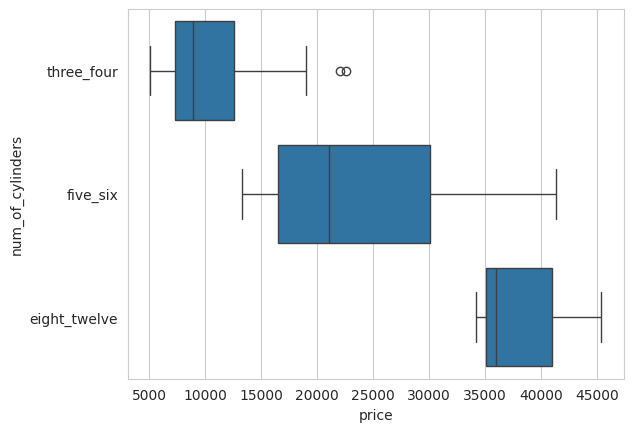

Calcular la frecuencia de cada categoría de la columna 'body_style'.

sedan          92
hatchback      63
wagon          24
hardtop         8
convertible     6
Name: body_style, dtype: int64

Dos de las categorías tienen un número bajo de ocurrencias. Estas categorías  se pueden agregar de forma similar a cómo se hizo con la columna '`num_of_cylinders`'.

Los valores '`hardtop`' y '`convertible`' se agruparán en '`hardtop_convert`.

sedan              92
hatchback          63
wagon              24
hardtop_convert    14
Name: body_style, dtype: int64

Mostrar con diagramas de cajas (boxplot) la distribución de precios para cada una de las categorias de la columna `body_style`.

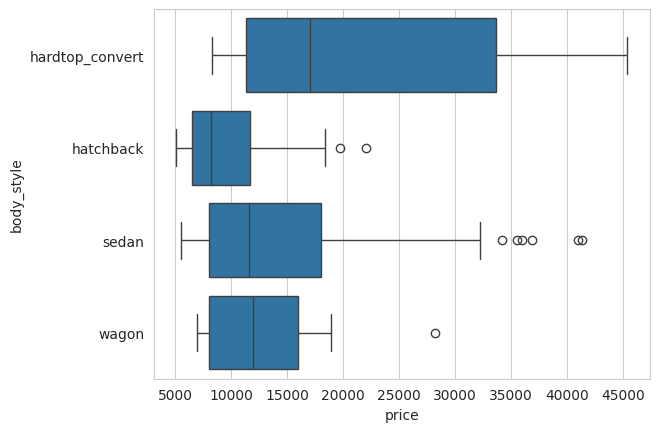

Usar `matplotlib.cbook.boxplot_stats` para mostrar la información del precio del las filas con valor '*sedan*' en la columna '*body_style*'.

[{'mean': 14563.66304347826,
  'iqr': 10010.0,
  'cilo': 9941.025011501615,
  'cihi': 13217.974988498385,
  'whishi': 32250,
  'whislo': 5499,
  'fliers': array([41315, 36879, 35550, 36000, 34184, 40960]),
  'q1': 7990.0,
  'med': 11579.5,
  'q3': 18000.0}]

Usando el valor '`whishi`' recién calculado, eliminar las filas que tienen ese precio cuando en la columna '*body_style*' se encuentra el valor '*sedan*'.

Comprobar el efecto volviendo a mostrar el diagrama de cajas del precio en función de la columna '*body_style*'.

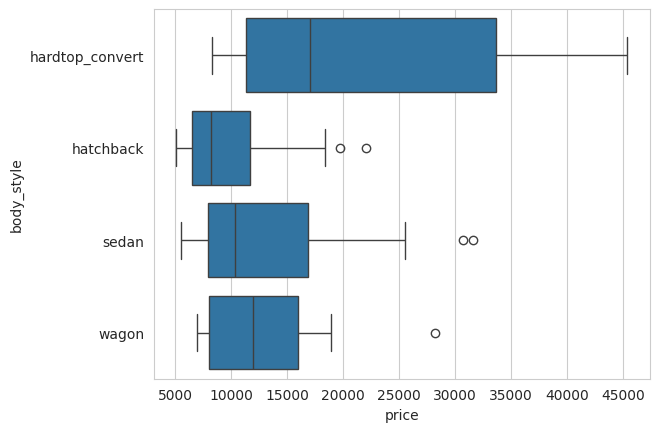

### Mostrar un mapa de calor de las columnas numéricas


In [ ]:
# Localizar el nombre de las columnas numéricas



['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


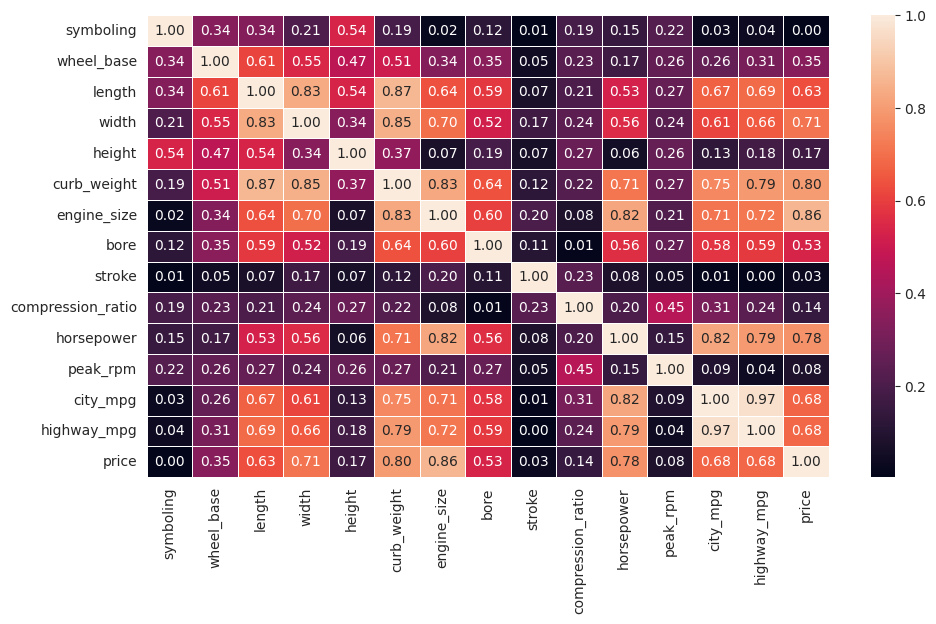

In [ ]:
# Valores absolutos de las correlaciones


# Mapa de calor



### Guardar en un fichero *csv* el dataset preparado